In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('TK_Masterdata.csv')

In [7]:
df.head()

Detail of Gifts      Item Category  \
0          Two  small  silver\nBowls  Decoration Pieces   
1            One Pilot Pen with\nink                Pen   
2                    One silver vase  Decoration Pieces   
3  One  (decoration)\nfolding Screen  Decoration Pieces   
4             One  Decoration\nPiece  Decoration Pieces   

                                   Name of Recipient Affiliation       Date  \
0  Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...    Gen Mush   1/8/2002   
1  Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...    Gen Mush   1/8/2002   
2             Mr. Shaukat Aziz, Minister for Finance    Gen Mush   1/9/2002   
3  Mr.  Abdul Sattar,  Minister  for  Foreign\nAf...    Gen Mush  1/15/2002   
4  Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...    Gen Mush  1/22/2002   

  Assessed Value Retention Cost Retained Remarks  
0     Rs.5,000/-   Free of cost      Yes     Yes  
1     Rs.3,500/-   Free of cost      Yes     Yes  
2     Rs.7,500/-   Free of cost      Yes     Yes  
3     Rs.2,200/-   Free of cost      Yes     Yes  
4     Rs.2,000/-   Free of cost      Yes     Yes

In [8]:
def clean_value(value):
    # If the value is already a float, return it as is
    if isinstance(value, float):
        return value
    # Otherwise, perform the string operations to clean up the value
    value = value.replace('Rs.', '').replace('/-', '')
    value = value.replace(',', '')
    try:
        value = int(value)
    except ValueError:
        value = None
    return value

# Apply the clean_value function to the Assessed Value column
df['Assessed Value'] = df['Assessed Value'].apply(clean_value)
df['Retention Cost'] = df['Retention Cost'].apply(clean_value)

# Remove any rows where the Assessed Value column is null
df = df.dropna(subset=['Assessed Value'])

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


In [9]:
df1 = pd.read_csv('cleaned_data.csv')

In [10]:
df1.head(100)

Detail of Gifts      Item Category  \
0           Two  small  silver\nBowls  Decoration Pieces   
1             One Pilot Pen with\nink                Pen   
2                     One silver vase  Decoration Pieces   
3   One  (decoration)\nfolding Screen  Decoration Pieces   
4              One  Decoration\nPiece  Decoration Pieces   
..                                ...                ...   
95          Crystal\ndecoration piece  Decoration Pieces   
96  One  Video\nPlayer  (Shinko\nDVD)               Tech   
97       One  DVD  Set\nwith speakers               Tech   
98             One  decoration\npiece  Decoration Pieces   
99               One  coffee\nmachine               Tech   

                                    Name of Recipient Affiliation       Date  \
0   Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...    Gen Mush   1/8/2002   
1   Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...    Gen Mush   1/8/2002   
2              Mr. Shaukat Aziz, Minister for Finance    Gen Mush   1/9/2002   
3   Mr.  Abdul Sattar,  Minister  for  Foreign\nAf...    Gen Mush  1/15/2002   
4   Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...    Gen Mush  1/22/2002   
..                                                ...         ...        ...   
95        Mr.  Shaukat  Aziz,  Minister  for\nFinance         NaN  5/13/2002   
96  Mr.  Abdul  Sattar,  Minister  for\nForeign Af...         NaN  5/16/2002   
97  Mr.  Inam-ul-Haque,  Foreign\nSecretary, M/o F...         NaN  5/18/2002   
98  Mr.  Abdul  Sattar,  Minister  for\nForeign Af...         NaN  5/29/2002   
99  General  Parvez Musharraf, President\n/ Chief ...    Military  5/31/2002   

    Assessed Value  Retention Cost Retained Remarks  
0           5000.0             NaN      Yes     Yes  
1           3500.0             NaN      Yes     Yes  
2           7500.0             NaN      Yes     Yes  
3           2200.0             NaN      Yes     Yes  
4           2000.0             NaN      Yes     Yes  
..             ...             ...      ...     ...  
95          1300.0             NaN      Yes     Yes  
96          9500.0             NaN      Yes     Yes  
97         11300.0           195.0      Yes     Yes  
98          2300.0             NaN      Yes     Yes  
99         11500.0           225.0      Yes     Yes  

[100 rows x 9 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 0 to 4539
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Detail of Gifts    3128 non-null   object 
 1   Item Category      1931 non-null   object 
 2   Name of Recipient  3127 non-null   object 
 3   Affiliation        1251 non-null   object 
 4   Date               3127 non-null   object 
 5   Assessed Value     3128 non-null   float64
 6   Retention Cost     1131 non-null   float64
 7   Retained           3127 non-null   object 
 8   Remarks            3127 non-null   object 
dtypes: float64(2), object(7)
memory usage: 244.4+ KB


In [12]:
df1.isnull().sum()

Detail of Gifts         0
Item Category        1197
Name of Recipient       1
Affiliation          1877
Date                    1
Assessed Value          0
Retention Cost       1997
Retained                1
Remarks                 1
dtype: int64

In [13]:
len(df)

3128

In [14]:
# Drop all rows where 'Name of Recipient' is null
df1 = df1.dropna(subset=['Name of Recipient'])


In [15]:
# Replace NaN values in 'Item Category' column with 'No data'
df1['Item Category'] = df1['Item Category'].fillna('No Information')

In [16]:
# Replace NaN values in ' Affiliation' column with 'No data'
df1['Affiliation'] = df1['Affiliation'].fillna('Unknown')

In [17]:
# Replace NaN values in 'Date' column with value from above row
df1['Date'] = df1['Date'].fillna(method='ffill')

In [18]:
# Replace NaN values in 'Retention Cost' column with 'No data'
df1['Retention Cost'] = df1['Retention Cost'].fillna('No Information')

In [19]:
# Replace NaN values in 'Retained' column with 'No data'
df1['Retained'] = df1['Retained'].fillna('No data')

In [20]:
# Replace NaN values in 'Remarks' column with 'No data'
df1['Remarks'] = df1['Remarks'].fillna('No data')

In [21]:
#now data are fully clearn
df1.isnull().sum()

Detail of Gifts      0
Item Category        0
Name of Recipient    0
Affiliation          0
Date                 0
Assessed Value       0
Retention Cost       0
Retained             0
Remarks              0
dtype: int64

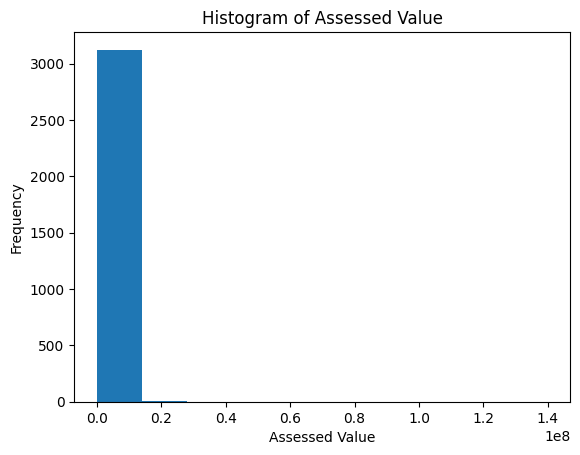

In [22]:
import matplotlib.pyplot as plt
column_to_plot = 'Assessed Value'
df[column_to_plot] = df[column_to_plot].astype(float)

plt.hist(df[column_to_plot], bins=10)

plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_to_plot)

# Display the plot
plt.show()


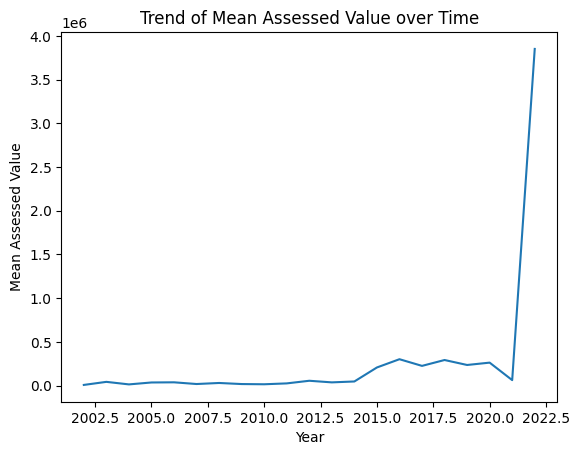

In [23]:
import matplotlib.pyplot as plt


# Convert the Date column to a datetime object, with errors set to 'coerce'
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y', errors='coerce')

# Drop rows with invalid dates (i.e. NaT values)
df1.dropna(subset=['Date'], inplace=True)

# Group the data by year and calculate the mean of the Assessed Value column
yearly_mean = df1.groupby(df1['Date'].dt.year)['Assessed Value'].mean()

# Create a line chart of the yearly mean of the Assessed Value column
plt.plot(yearly_mean.index, yearly_mean.values)
plt.xlabel('Year')
plt.ylabel('Mean Assessed Value')
plt.title('Trend of Mean Assessed Value over Time')
plt.show()


In [24]:
df1['Retention Cost'].isnull().sum()

0

In [25]:
"""Identify the person who has used toshakhana(datset name) with most
expense(on Assessed Value and retentioncost),year wise and month."""
df1['Retention Cost'] = df1['Retention Cost'].replace('Free of cost', 0.0)
df1['Retention Cost'] = df1['Retention Cost'].replace('No Information', 1.1)

df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y', errors='coerce')

df1.dropna(subset=['Date'], inplace=True)


grouped = df1.groupby(['Name of Recipient', df1['Date'].dt.year, df1['Date'].dt.month])['Assessed Value', 'Retention Cost'].sum()

grouped['Total Expense'] = grouped['Assessed Value'] + grouped['Retention Cost']
grouped = grouped.sort_values(by='Total Expense', ascending=False)
\
top_recipient = grouped.iloc[0]

print('Top recipient:', top_recipient.name[0])
print('Year:', top_recipient.name[1])
print('Month:', top_recipient.name[2])
print('Assessed Value:', top_recipient['Assessed Value'])
print('Retention Cost:', top_recipient['Retention Cost'])
print('Total Expense:', top_recipient['Total Expense'])


Top recipient: Mian  Muhammad  Shehbaz  Sharif,
Prime Minister of Pakistan
Year: 2022
Month: 12
Assessed Value: 140016000.0
Retention Cost: 2.2
Total Expense: 140016002.2


In [26]:
"""Find the person who retained most number of gifts without paying retentioncost.Also sum
up the AssessedValue of those gifts.give me code for above"""

df = pd.read_csv('cleaned_data.csv')

df_filtered = df[(df['Retained'] == 'Yes') & (df['Retention Cost'].isnull() | (df['Retention Cost'] == 0))]

grouped = df_filtered.groupby('Name of Recipient')['Detail of Gifts', 'Assessed Value'].agg({'Detail of Gifts': 'count', 'Assessed Value': 'sum'})

grouped = grouped.sort_values(by='Detail of Gifts', ascending=False)

top_recipient = grouped.iloc[0]

print('Top recipient:', top_recipient.name)
print('Number of gifts retained:', top_recipient['Detail of Gifts'])
print('Total assessed value:', top_recipient['Assessed Value'])





Top recipient: Mr.  Shaukat  Aziz,  Prime
Minister of Pakistan
Number of gifts retained: 332.0
Total assessed value: 1282150.0


In [27]:
"""
Generate actionable insight recommendations based on the findins from the EDA.
give me code for above

"""

data = pd.read_csv("cleaned_data.csv")

num_gifts = data["Detail of Gifts"].nunique()
num_recipients = data["Name of Recipient"].nunique()
avg_assessed_value = data["Assessed Value"].mean()
num_watches = data[data["Item Category"] == "Watches"]["Detail of Gifts"].nunique()
most_expensive_watch = data[data["Item Category"] == "Watches"]["Assessed Value"].max()

print("Insights and Recommendations:")
print("- There were", num_gifts, "unique gifts in the dataset.")
print("- There were", num_recipients, "unique recipients in the dataset.")
print("- The average assessed value of a gift was", avg_assessed_value)
print("- There were", num_watches, "unique watches in the dataset.")
print("- The most expensive watch was valued at", most_expensive_watch)


Insights and Recommendations:
- There were 2258 unique gifts in the dataset.
- There were 1742 unique recipients in the dataset.
- The average assessed value of a gift was 210161.55147058822
- There were 0 unique watches in the dataset.
- The most expensive watch was valued at nan


In [28]:
"""
Find the person who retained most number of watches and what was price of most expensive watch.
give me code for above

"""


df = pd.read_csv('cleaned_data.csv')

df_filtered = df[(df['Retained'] == 'Yes') & (df['Item Category'] == 'Watch')]

grouped = df_filtered.groupby('Name of Recipient')['Detail of Gifts', 'Assessed Value'].agg({'Detail of Gifts': 'count', 'Assessed Value': 'max'})

grouped = grouped.sort_values(by='Detail of Gifts', ascending=False)

if len(grouped) > 0:
    top_recipient = grouped.iloc[0]

    if top_recipient['Detail of Gifts'] > 0:
        print('Top recipient:', top_recipient.name)
        print('Number of watches retained:', top_recipient['Detail of Gifts'])
        print('Price of most expensive watch:', top_recipient['Assessed Value'])
    else:
        print('No watches retained by any recipient')
else:
    print('No watches found in the dataset')


Top recipient: Mr.  Shaukat  Aziz,  Prime
Minister of Pakistan
Number of watches retained: 4.0
Price of most expensive watch: 1350000.0
